In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

In [ ]:
import pandas as pd

# Define the path to your CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/zomato.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path,encoding='latin-1')

# Display the first few rows to verify
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

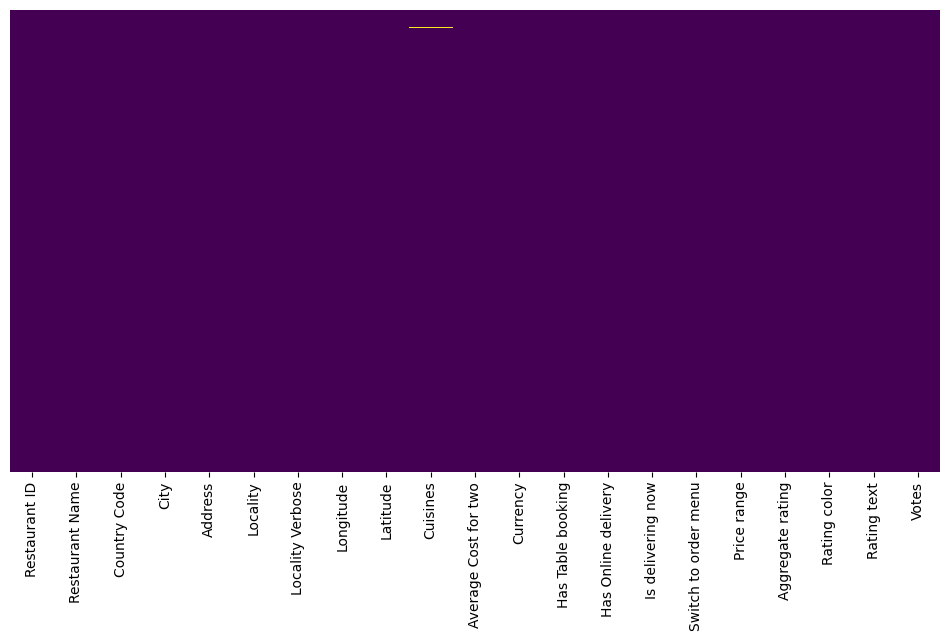

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/Country-Code.xlsx'
df_country=pd.read_excel(file_path1)
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')

In [ ]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
final_df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [ ]:
country_names=final_df.Country.value_counts().index

NameError: name 'final_df' is not defined

In [ ]:
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [ ]:
country_val=final_df.Country.value_counts().values

In [ ]:
country_val


array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [ ]:
final_df.Country.value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24


([<matplotlib.patches.Wedge at 0x7c968d5cf990>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

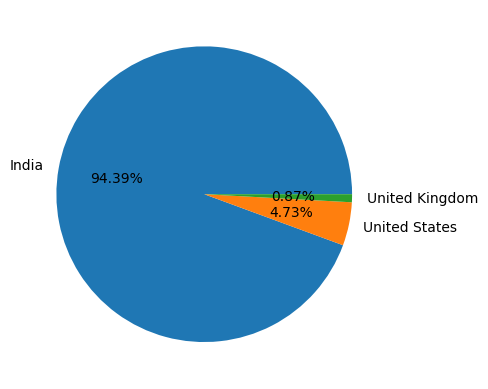

In [ ]:
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

observation maximum restaurants from india then USA and UK

In [ ]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()
ratings

,,,0
Aggregate rating,Rating color,Rating text,
0.0,White,Not rated,2148
1.8,Red,Poor,1
1.9,Red,Poor,2
2.0,Red,Poor,7
2.1,Red,Poor,15
2.2,Red,Poor,27
2.3,Red,Poor,47
2.4,Red,Poor,87
2.5,Orange,Average,110


In [ ]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [ ]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor
maxium user have not rated zero

In [ ]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

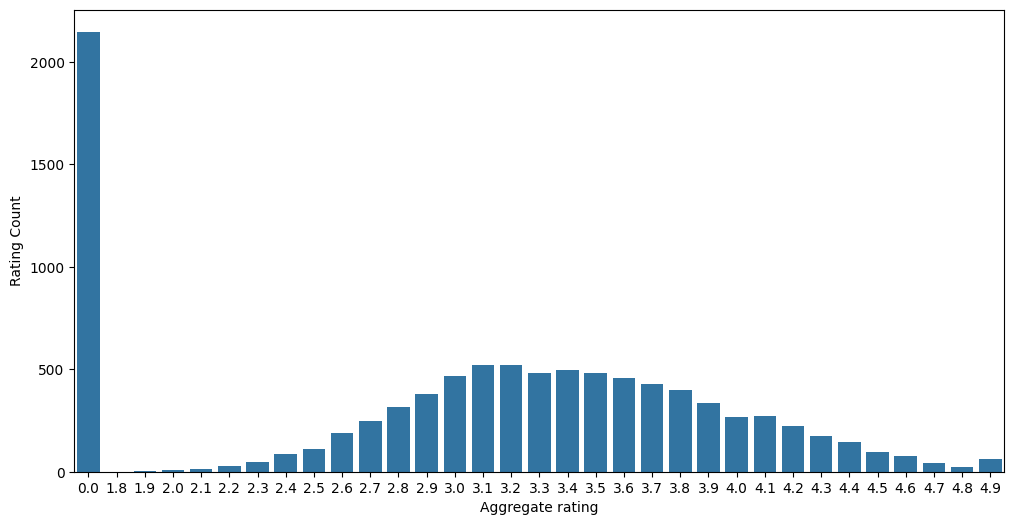

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

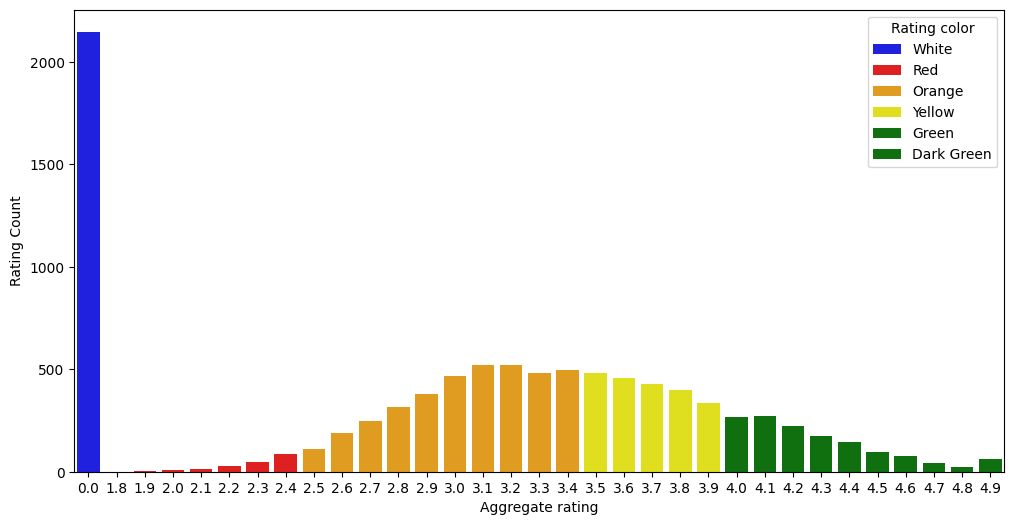

In [ ]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

Observation:
1. Not Rated count is very high
2. Maximum number of rating are between 2.5 to 3.4

<ipython-input-37-2f39177f272f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

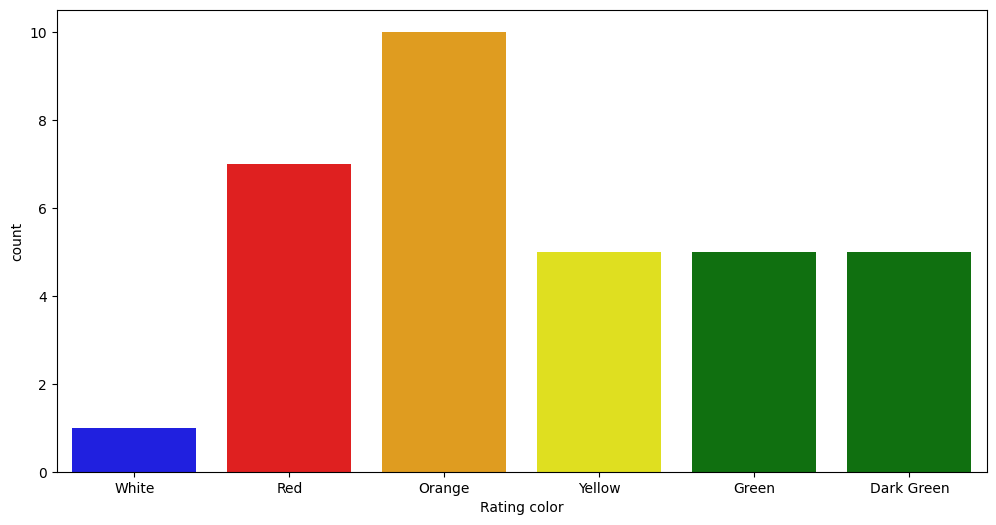

In [ ]:
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

shows the frequency

In [ ]:
#zero rating country
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


maximum zero ratings from indian customers

In [ ]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(20)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [ ]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
final_df[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [ ]:
## Which Countries do have online deliveries option

final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

,count
Country,
India,2423
UAE,28


Observations:
1. Online Deliveries are available in India and UAE    

([<matplotlib.patches.Wedge at 0x7c968cc90590>,
 [Text(-0.6041184274954416, 0.9192610758432205, 'New Delhi'),
  Text(0.034815375370853566, -1.0994489026952488, 'Gurgaon'),
  Text(0.8589153557618371, -0.6872149675585632, 'Noida'),
  Text(1.087417404265874, -0.16590174471556665, 'Faridabad'),
  Text(1.0989896607468026, -0.04713518400969513, 'Ghaziabad'),
  Text(1.0996624470627976, -0.027248899424747827, 'Bhubaneshwar'),
  Text(1.099962491482648, -0.009083905068075139, 'Amritsar')],
 [Text(-0.3295191422702409, 0.5014151322781202, '68.51%'),
  Text(0.01899020474773831, -0.5996994014701357, '13.99%'),
  Text(0.468499284961002, -0.37484452775921623, '13.52%'),
  Text(0.5931367659632039, -0.09049186075394543, '3.14%'),
  Text(0.5994489058618923, -0.025710100368924613, '0.31%'),
  Text(0.5998158802160714, -0.014863036049862449, '0.26%'),
  Text(0.599979540808717, -0.004954857309859166, '0.26%')])

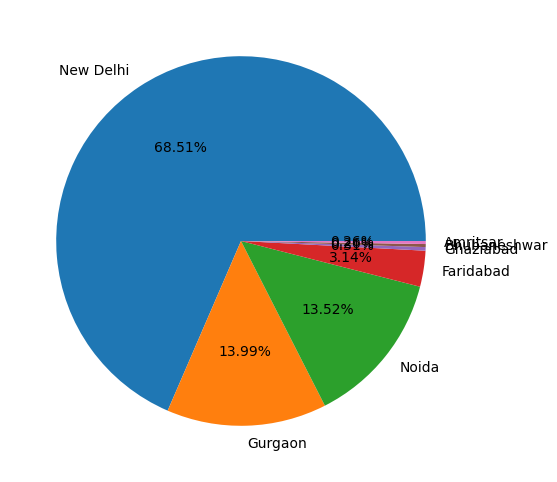

In [ ]:
##create a pie chart
final_df.City.value_counts().index
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index
plt.pie(city_values[:7],labels=city_labels[:7],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7c968caff450>,
 [Text(0.6143494844020819, 0.9124553200101889, 'North Indian'),
  Text(-0.8749581628120001, 0.6666694933238282, 'North Indian, Chinese'),
  Text(-1.0650055556367306, -0.27525109711479573, 'Chinese'),
  Text(-0.6009335919204952, -0.9213461988316508, 'Fast Food'),
  Text(0.15468411816432115, -1.0890697055688063, 'North Indian, Mughlai'),
  Text(0.7911140973939107, -0.7642895295008418, 'Cafe'),
  Text(1.0715738706622477, -0.2484540998130818, 'Bakery')],
 [Text(0.33509971876477196, 0.49770290182373933, '31.14%'),
  Text(-0.47724990698836367, 0.36363790544936075, '17.00%'),
  Text(-0.5809121212563985, -0.15013696206261581, '11.78%'),
  Text(-0.327781959229361, -0.5025524720899913, '11.78%'),
  Text(0.08437315536235698, -0.5940380212193488, '11.11%'),
  Text(0.43151678039667857, -0.41688519790955003, '9.95%'),
  Text(0.5844948385430441, -0.1355204180798628, '7.25%')])

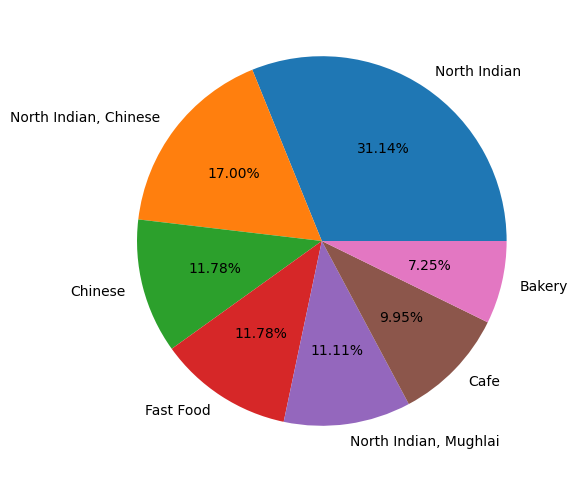

In [ ]:
final_df.Cuisines.value_counts().index
Cuisine_values=final_df.Cuisines.value_counts().values
Cuisine_labels=final_df.Cuisines.value_counts().index
plt.pie(Cuisine_values[:7],labels=Cuisine_labels[:7],autopct='%1.2f%%')

In [ ]:
Cuisine_values

array([936, 511, 354, ...,   1,   1,   1])

In [ ]:
final_df[['Cuisines','Aggregate rating']].groupby(['Cuisines','Aggregate rating']).size().reset_index()

,Cuisines,Aggregate rating,0
0,Afghani,0.0,3
1,Afghani,2.9,1
2,"Afghani, Mughlai, Chinese",0.0,1
3,"Afghani, North Indian",0.0,1
4,"Afghani, North Indian, Pakistani, Arabian",0.0,1
...,...,...,...
3919,"Western, Asian, Cafe",4.2,1
3920,"Western, Fusion, Fast Food",3.2,1
3921,World Cuisine,4.9,1
3922,"World Cuisine, Mexican, Italian",4.4,1
